In [2]:
pip install kagglehub


   ---------------------------------------- 0/2 [pyyaml]
   ---------------------------------------- 0/2 [pyyaml]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import kagglehub
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [32]:
# Download latest version
path = kagglehub.dataset_download("stefanouccelli/tesis-1")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\el_me\.cache\kagglehub\datasets\stefanouccelli\tesis-1\versions\1


In [33]:
# List files in the downloaded directory
files_in_path = os.listdir(path)
print("Files in the downloaded directory:", files_in_path)

Files in the downloaded directory: ['PS_20174392719_1491204439457_log (1).csv.crdownload']


In [ ]:
# Construct the full path to the downloaded file
old_file_path = os.path.join(path, files_in_path[0])

# Construct the new file path in a writable directory
new_file_path_in_writable = os.path.join( files_in_path[0])

# Copy the file to the writable directory
shutil.copyfile(old_file_path, new_file_path_in_writable)

print(f"Copied '{old_file_path}' to '{new_file_path_in_writable}'")

# Construct the final file path after removing '.crdownload'
final_file_path = new_file_path_in_writable.replace('.crdownload', '')

# Rename the copied file
os.rename(new_file_path_in_writable, final_file_path)

print(f"Renamed '{new_file_path_in_writable}' to '{final_file_path}'")

# Load the renamed file into a pandas DataFrame
df = pd.read_csv(final_file_path)

# Display the first few rows of the DataFrame
display(df.head())

Copied 'C:\Users\el_me\.cache\kagglehub\datasets\stefanouccelli\tesis-1\versions\1\PS_20174392719_1491204439457_log (1).csv.crdownload' to 'PS_20174392719_1491204439457_log (1).csv.crdownload'
Renamed 'PS_20174392719_1491204439457_log (1).csv.crdownload' to 'PS_20174392719_1491204439457_log (1).csv'


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706070 entries, 0 to 3706069
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 311.0+ MB


In [5]:
df.sample(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2881374,228,CASH_IN,308951.31,C658714397,2050251.69,2359203.00,C266963012,1469231.63,1160280.32,0.0,0.0
2060131,181,CASH_OUT,391445.11,C368005188,26798.00,0.00,C174217117,42452.45,433897.57,0.0,0.0
1287887,135,PAYMENT,29460.67,C711407708,244356.00,214895.33,M327731298,0.00,0.00,0.0,0.0


 El archivo contiene un total de 3.706.070 registros y un total de  11 columnas
* step: Indica probablemente el momento (horas o secuencia) de la transacción.
* type: Tipo de transacción (CASH_OUT, PAYMENT, etc.).
* amount: Monto de la transacción.
* nameOrig, nameDest: Identificadores de origen y destino (anónimos).
* oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest: Saldos antes y después en origen y destino.
* isFraud: Indicador si la transacción es fraude.
* isFlaggedFraud: Indicador de alerta (¿posible fraude detectado automáticamente?).


In [40]:
# Comprobar valores faltantes en cada columna
missing_summary = df.isnull().sum()
missing_summary_df = pd.DataFrame({"Columna": missing_summary.index, "Valores Faltantes": missing_summary.values})
missing_summary_df

,Columna,Valores Faltantes
0,step,0
1,type,0
2,amount,0
3,nameOrig,1
4,oldbalanceOrg,1
5,newbalanceOrig,1
6,nameDest,1
7,oldbalanceDest,1
8,newbalanceDest,1
9,isFraud,1


imputacion de valores faltantes

In [42]:
#Eliminar las filas na
df = df[df['nameOrig'].notna()]

In [43]:
#Valores duplicados

duplicated_rows = df[df.duplicated(keep=False)]
num_duplicated_rows = duplicated_rows.shape[0]

num_duplicated_rows, duplicated_rows.head()

(0,
 Empty DataFrame
 Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
 Index: [])

* No se encontraron valores duplicados y se elimino una fila que contenia valores nulos.
* Podemos proceder a realizar el analisis de los datos.

1.1 Analisis Univariado

In [13]:
#Analisis Univariado

numericas = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
categoricas = ['type', 'nameOrig', 'nameDest']

In [15]:
df[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
step,3706070.0,1.486751e+02,8.533517e+01,1.0,43.0000,164.00,214.000,2.770000e+02
amount,3706070.0,1.559766e+05,2.919417e+05,0.0,12372.0625,75103.55,208704.835,9.244552e+07
oldbalanceOrg,3706069.0,8.384820e+05,2.904529e+06,0.0,0.0000,14552.00,111135.000,3.893942e+07
newbalanceOrig,3706069.0,8.599043e+05,2.940909e+06,0.0,0.0000,0.00,149998.220,3.894623e+07
oldbalanceDest,3706069.0,9.929963e+05,2.304300e+06,0.0,0.0000,136255.05,938947.590,9.701472e+07
newbalanceDest,3706069.0,1.095616e+06,2.390822e+06,0.0,0.0000,220574.62,1114937.860,1.500147e+08
isFraud,3706069.0,8.480684e-04,2.910927e-02,0.0,0.0000,0.00,0.000,1.000000e+00
isFlaggedFraud,3706069.0,5.396554e-07,7.346123e-04,0.0,0.0000,0.00,0.000,1.000000e+00


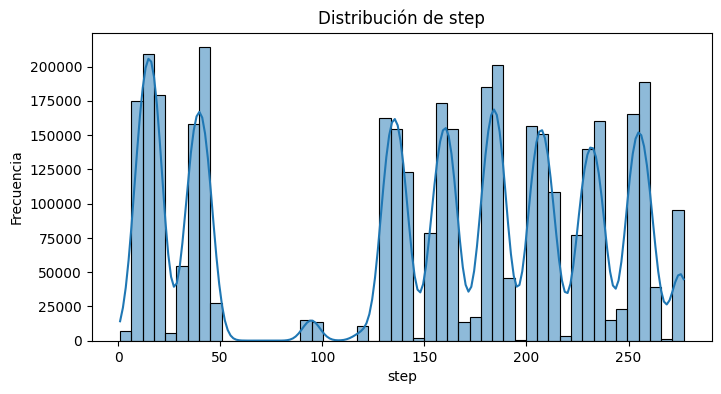

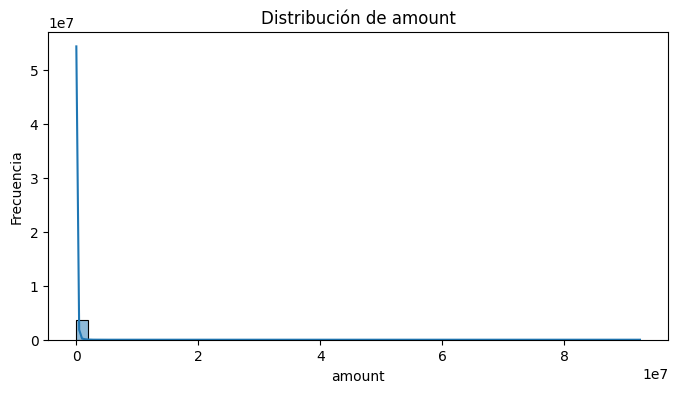

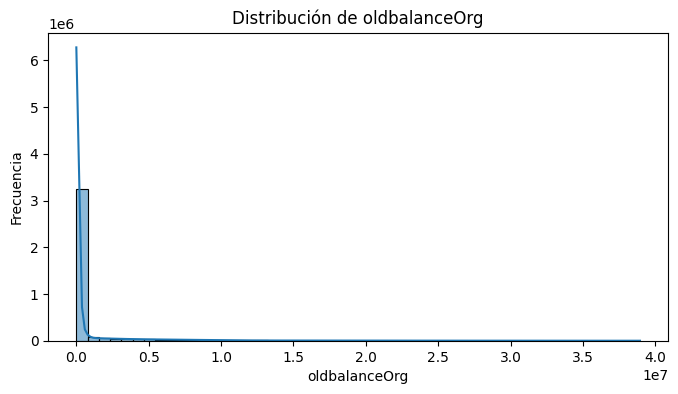

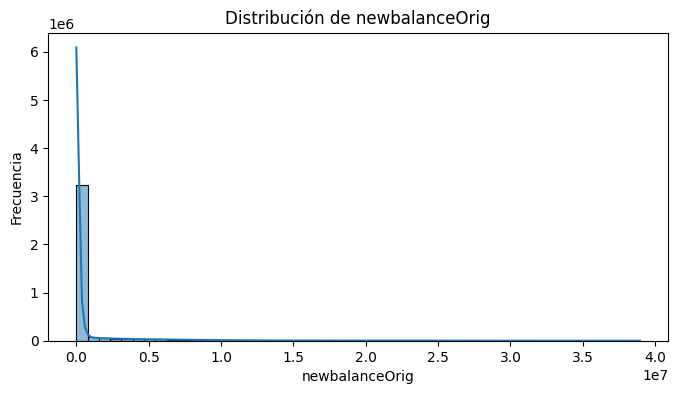

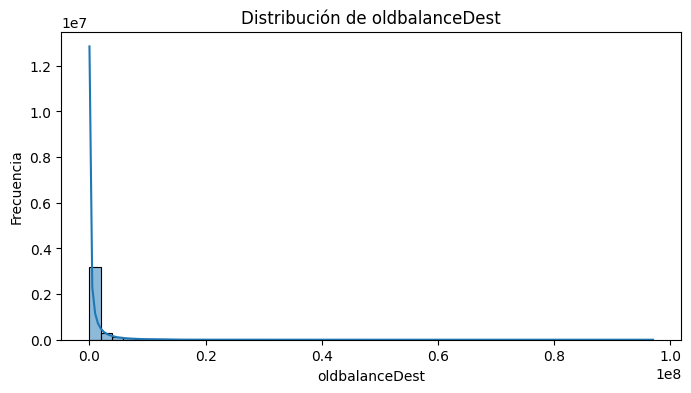

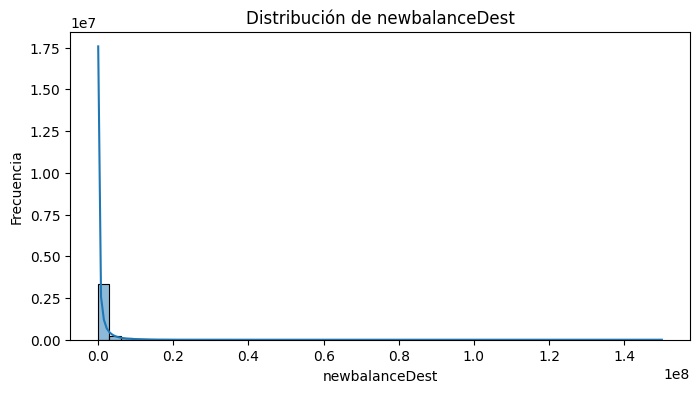

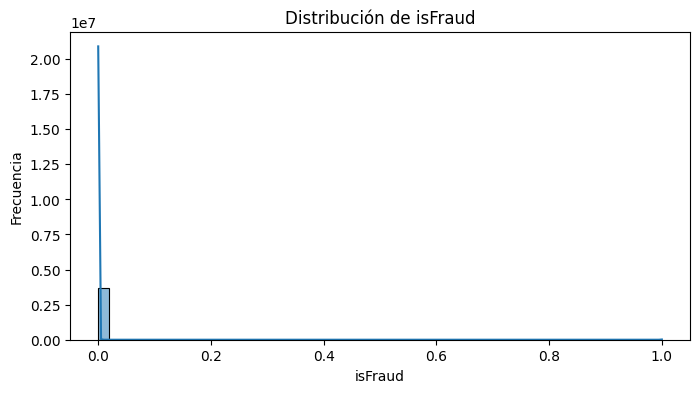

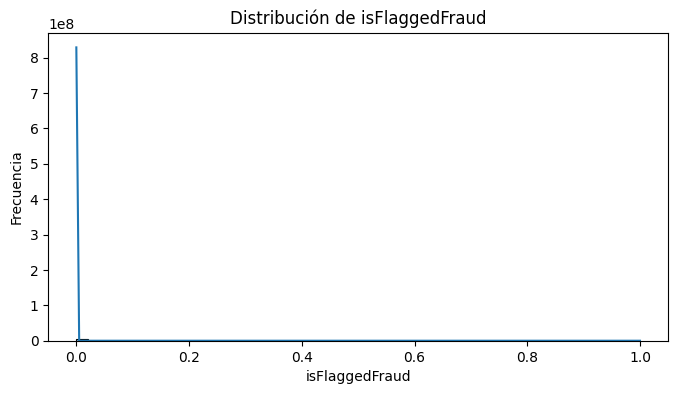

In [18]:
# Histograma para cada variable numérica 
for col in numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


In [33]:
display(df[df['amount']==0]['type'].count())
display(df[df['amount']>0]['type'].count())

np.int64(2)

np.int64(3706068)

In [20]:
df['type'].value_counts(normalize=True)

type
CASH_OUT    0.355214
PAYMENT     0.336906
CASH_IN     0.219051
TRANSFER    0.082653
DEBIT       0.006176
Name: proportion, dtype: float64

* Tenemos una distribución muy sesgada a la derecha con muchos valores bajos y muy pocos valores altos de todos los valores numericos sin contar los datos binarios.
* Tenemos outlier relacionados a los valores de las transacciones.
* En tipo de transacciones tenemos CASH_OUT con un 35%, PAYMENT con 33%, CASH-IN con 21%, TRANSFER 8% y DEBIT con 0.6%

In [39]:
#Desbalanceo de las muestras'isFraud' y 'isFlaggedFraud'
df['isFraud'].value_counts(normalize=True)

isFraud
0.0    0.999152
1.0    0.000848
Name: proportion, dtype: float64

* Podemos ver que el 99% de las transacciones no son fraudulentas y menos de un 0.1% son fraudulentas. por lo que tenemos un fuerte desbalanceo de las muestras.
* El desbalanceo de las muestras nos indican que hay una necedidad de oversamplig o undessamplig
* Las mejores meticas para la evaluación del modelo  son (F1, Recall y  Presición).
* La ingenieria de caracteristicas sera muy necesaria para poder identificar las transacciones fraudulentas.

Revisión de la asimetria y curtosis de los datos

In [46]:
# Calcular asimetría (skewness) y curtosis
skewness = df[numericas].apply(skew)
kurt = df[numericas].apply(kurtosis)

# Mostrar los resultados
results = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
results.round(3)

,Skewness,Kurtosis
step,-0.411,-1.195
amount,31.513,5304.239
oldbalanceOrg,5.234,32.531
newbalanceOrig,5.166,31.730
oldbalanceDest,5.428,46.104
newbalanceDest,5.408,54.999
isFraud,34.295,1174.151
isFlaggedFraud,1361.261,1853029.500


* La asimetria nos indica que hay muchos valores sesgados asia la derecha muchos valores bajos y otros extremadamente altos.
* La curtosisi nos indica valores outliers muy altos en especial para amount, fraude esta muy alto como lo hemos visto anteriormente por el desbalanceo de las muestras.
* Las transformaciones de los datos pueden ser un buen punto de partida, transformaciones logaritmicas, raiz cuadrada, yeo-jhonson u otras pueden ser importantes

In [51]:
numericas

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

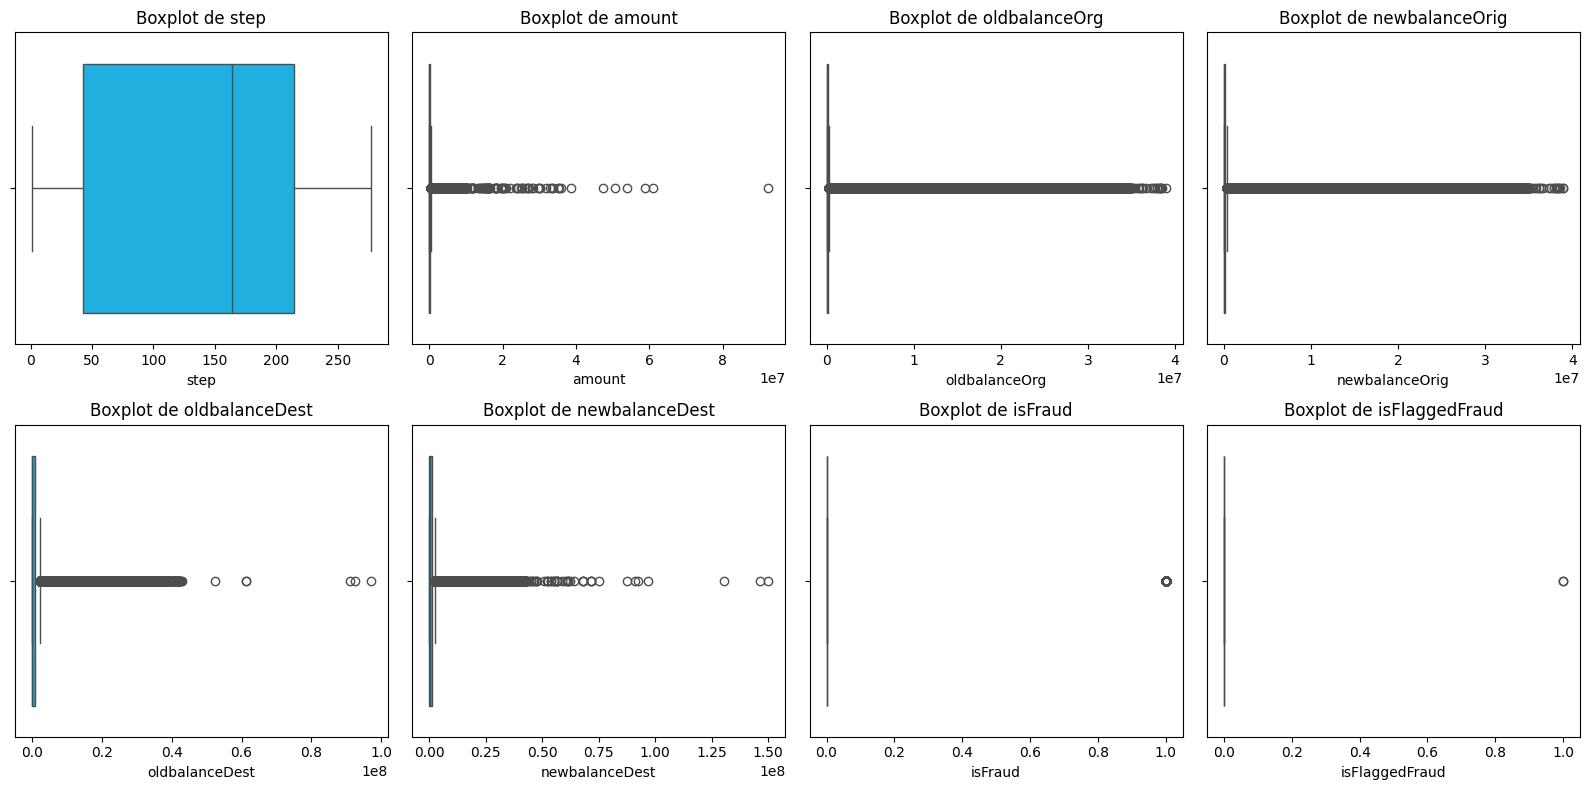

In [52]:
# Graficos de caja
plt.figure(figsize=(16, 8))
for i, col in enumerate(numericas, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col], color='deepskyblue')
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
plt.show()

2. Analisis Bivariado

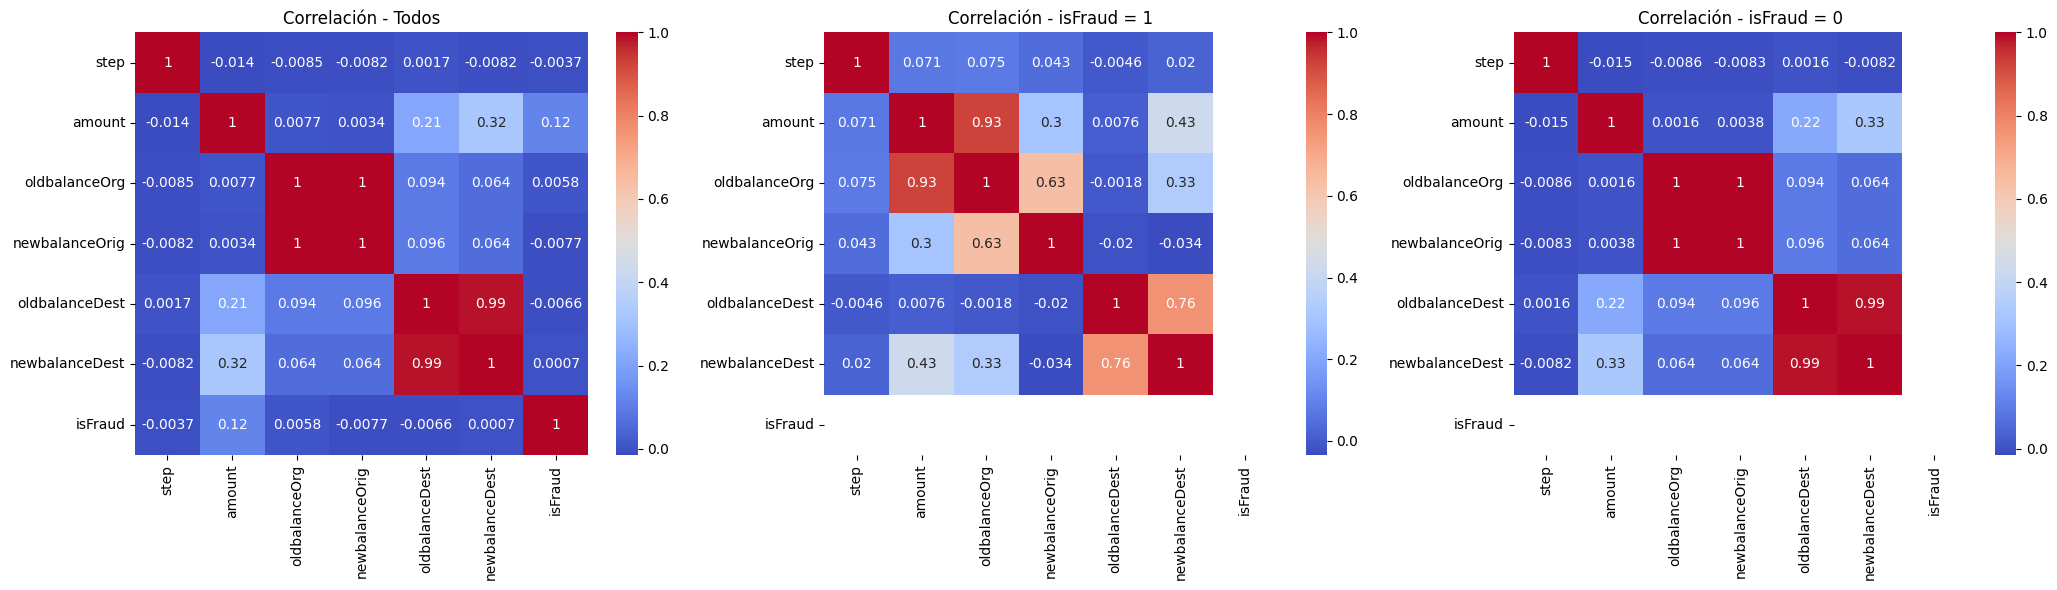

In [ ]:
# Definir variables numéricas relevantes
numeric_vars = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
'oldbalanceDest', 'newbalanceDest', 'isFraud']

# 1. Heatmap para todo el dataset
corr_all = df[numeric_vars].corr()

# 2. Heatmap para isFraud == 1
corr_fraud = df[df['isFraud'] == 1][numeric_vars].corr()

# 3. Heatmap para isFraud == 0
corr_nofraud = df[df['isFraud'] == 0][numeric_vars].corr()

# Crear heatmaps
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

sns.heatmap(corr_all, annot=True, cmap="coolwarm", ax=axs[0])
axs[0].set_title('Correlación - Todos')

sns.heatmap(corr_fraud, annot=True, cmap="coolwarm", ax=axs[1])
axs[1].set_title('Correlación - isFraud = 1')

sns.heatmap(corr_nofraud, annot=True, cmap="coolwarm", ax=axs[2])
axs[2].set_title('Correlación - isFraud = 0')

plt.tight_layout()
plt.show()
######

In [ ]:
#Correlaciones
print("Corrleacionesfraude")
display(corr_fraud)
display(corr_nofraud)

Corrleacionesfraude


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.071086,0.075252,0.043067,-0.004601,0.020477,NaN
amount,0.071086,1.000000,0.926179,0.297732,0.007625,0.425359,NaN
oldbalanceOrg,0.075252,0.926179,1.000000,0.633808,-0.001758,0.330699,NaN
newbalanceOrig,0.043067,0.297732,0.633808,1.000000,-0.020271,-0.034021,NaN
oldbalanceDest,-0.004601,0.007625,-0.001758,-0.020271,1.000000,0.760093,NaN
newbalanceDest,0.020477,0.425359,0.330699,-0.034021,0.760093,1.000000,NaN
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CorrleacionesNOfraude


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,-0.014822,-0.008581,-0.008271,0.001640,-0.008235,NaN
amount,-0.014822,1.000000,0.001621,0.003754,0.222720,0.327748,NaN
oldbalanceOrg,-0.008581,0.001621,1.000000,0.999419,0.093905,0.064091,NaN
newbalanceOrig,-0.008271,0.003754,0.999419,1.000000,0.095802,0.064294,NaN
oldbalanceDest,0.001640,0.222720,0.093905,0.095802,1.000000,0.986424,NaN
newbalanceDest,-0.008235,0.327748,0.064091,0.064294,0.986424,1.000000,NaN
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Las correlaciones